In [26]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

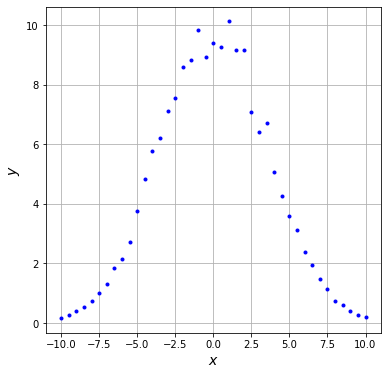

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./dados_MMQ_linearizados.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
x = x.reshape(len(x), 1)
y_noisy = y.reshape(len(y), 1)
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.show()

# Linearizando os dados

$y = a_1e^{-a_2x^2}$

$\ln{y} = \ln{a_1e^{-a_2x^2}}$

$\ln{y} = \ln{a_1} + \ln{e^{-a_2x^2}}$

$\ln{y} = \ln{a_1} - a_2x^2$

$y' = a1' - a_2x^2$

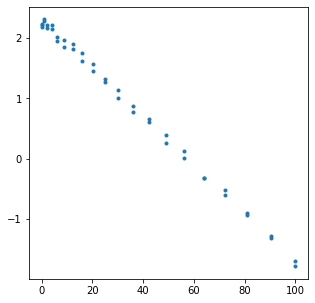

In [28]:
M = len(x)
x_ = x**2
y_ = np.log(y_noisy)

plt.figure(figsize=(5,5))
plt.plot(x_, y_, '.')
plt.show()

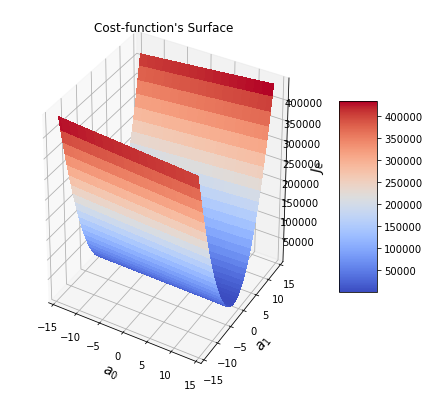

In [29]:

# Generate values for parameters.
N = 200
a0 = np.linspace(-14.0, 14.0, N)
a1 = np.linspace(-14.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x**2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_ - yhat))

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_fs_gradient_variation.png", dpi=600)
#Show the plot.
plt.show()

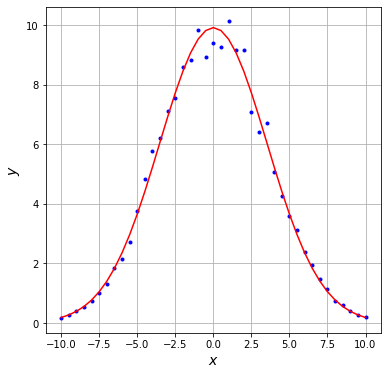

O valor de a1, encontrado pela equação normal, que ajusta à curva é: 9.912173773026254
O valor de a2, encontrado pela equação normal, que ajusta à curva é: -0.03993730014265547


In [30]:
# Closed-form solution.
X = np.c_[np.ones((M,1)), x_]
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_))
yhat = X.dot(a_opt)
Joptimum = (1.0/M)*np.sum(np.power((y_ - yhat), 2))

a1 = math.exp(a_opt[0,0])
a2 = a_opt[1,0]

y_pred = a1*np.exp(a2*x**2)

fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.')
plt.plot(x, y_pred, 'r')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.show()

print(f'O valor de a1, encontrado pela equação normal, que ajusta à curva é: {a1}')
print(f'O valor de a2, encontrado pela equação normal, que ajusta à curva é: {a2}')

In [31]:

def batchGradientDescent(X, y_, alpha=0.4, n_iterations=len(x), a_init=np.array([-10.0, -10.0]).reshape(2, 1)):
    """Batch gradient descent solution."""
    
    # Random initialization of parameters.
    a = a_init
    
    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/M)*sum(np.power(y_ - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.0001:
        gradients = -(2.0/M)*X.T.dot(y_ - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y_ - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration





In [32]:
# Constant learning rate.
alpha = 0.0003
# Random initialization of parameters.
a_init = np.array([-1, -1]).reshape(2, 1)
n_iterations = M
a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_, alpha, n_iterations, a_init)


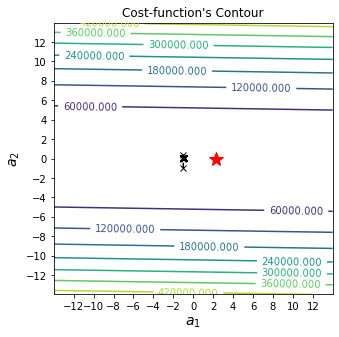

In [33]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0,0], a_opt[1,0], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
#plt.savefig("error_contour_no_fs_gradient_variation.png", dpi=600)
plt.show()

In [34]:
print(f"O valor de a1', encontrado pela equação normal, que ajusta à curva é: {a_opt[0,0]}")
print(f"O valor de a2', encontrado pela equação normal, que ajusta à curva é: {a_opt[1,0]}")
print(f"O valor de a1', encontrado pelo gradiente descendente, que ajusta à curva é: {a[0,0]}")
print(f"O valor de a2', encontrado pelo gradiente descendente, que ajusta à curva é: {a[1,0]}")

O valor de a1', encontrado pela equação normal, que ajusta à curva é: 2.293763675753699
O valor de a2', encontrado pela equação normal, que ajusta à curva é: -0.03993730014265547
O valor de a1', encontrado pelo gradiente descendente, que ajusta à curva é: -0.9483168814719906
O valor de a2', encontrado pelo gradiente descendente, que ajusta à curva é: 0.011575549329821931
